###**Dataset**

Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv

**About the dataset:**

Different features related to the breast are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.


* id: Id number
* agnosis: Cancer is Malignant or Benign (M = malignant, B = benign) - target variable

Other 20 features contain information about following 10 real valued features

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry  
* fractal dimension ("coastline approximation" - 1)

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#ignoring all warnings
import warnings
warnings.filterwarnings('ignore')

import shap

# load JS visualization code to notebook. Without this, the SHAP plots won't be displayed
shap.initjs()

## Load the data
Display the first 5 rows of the data after loading.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv")
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,914102,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,...,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,B
1,91858,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,...,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,B
2,88466802,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,B
3,9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,...,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,B
4,84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,...,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,M


In [ ]:
labels = df["diagnosis"].tolist()
df["diagnosis"] = df["diagnosis"].astype('category')
df.dtypes

id                            int64
radius_mean                 float64
texture_mean                float64
perimeter_mean              float64
area_mean                   float64
smoothness_mean             float64
compactness_mean            float64
concavity_mean              float64
concave points_mean         float64
symmetry_mean               float64
fractal_dimension_mean      float64
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           float64
concavity_worst             

In [ ]:
df["diagnosis"] = df["diagnosis"].cat.codes
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,914102,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,...,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,0
1,91858,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,...,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,0
2,88466802,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,0
3,9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,...,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,0
4,84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,...,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,1


0 - B 

1 - M

## Perform Basic Exploratory Data Analysis (EDA)

In [ ]:
cat_cols = df.select_dtypes(['category']).columns # Storing names of all categorical columns in cat_cols
cat_cols

Index([], dtype='object')

In [ ]:
df[cat_cols] = df[cat_cols].apply(lambda x: x.cat.codes) # Converting the categorical columns into numerical columns
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,914102,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,...,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,0
1,91858,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,...,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,0
2,88466802,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,0
3,9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,...,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,0
4,84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,...,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,1


## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
X_train.head()

(318, 32) (80, 32)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
64,911366,11.62,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,0.1957,...,25.40,88.14,528.1,0.1780,0.2878,0.3186,0.1416,0.2660,0.09270,0
55,88649001,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,...,36.27,178.60,1926.0,0.1281,0.5329,0.4251,0.1941,0.2818,0.10050,1
317,9113455,13.14,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.03510,0.1562,...,25.46,100.90,689.1,0.1351,0.3549,0.4504,0.1181,0.2563,0.08174,0
102,8712729,16.78,18.80,109.30,886.3,0.08865,0.09182,0.08422,0.06576,0.1893,...,26.30,130.70,1260.0,0.1168,0.2119,0.2318,0.1474,0.2810,0.07228,1
358,88119002,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.11450,0.06637,0.1428,...,45.41,180.20,2477.0,0.1408,0.4097,0.3995,0.1625,0.2713,0.07568,1


## Use Random Forest Machine Learning Model for prediction

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18).fit(X_train, y_train)

## Evaluate the model using Accuracy Score

In [ ]:
# Create our predictions
prediction = clf.predict(X_test)
# Create confusion matrix
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
confusion_matrix(y_test, prediction)
# Display accuracy score
accuracy_score(y_test, prediction)
# Display F1 score
f1_score(y_test,prediction)

0.9866666666666666

##  Use a SHAP Explainer to derive SHAP Values for the random forest ml model.

In [ ]:
# creating an explainer for our model
explainer = shap.TreeExplainer(clf)
#print(clf)
# finding out the shap values using the explainer

shap_values = explainer.shap_values(X_test)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values[1]).head()

Expected Value: [0.65389937 0.34610063]


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.006235,-0.004469,0.011636,-0.003563,-0.011911,-0.001072,0.000598,0.040201,0.009339,0.000260,...,0.016470,0.063358,-0.012516,0.006470,0.023954,0.043762,0.037527,0.003838,0.006402,0.208360
1,-0.001218,-0.014291,-0.002923,-0.020351,-0.022415,0.000101,-0.003294,-0.012920,-0.023479,-0.000925,...,0.003128,-0.031484,-0.032369,-0.001939,-0.004717,-0.012638,-0.019113,-0.000649,-0.002687,-0.069106
2,0.002956,-0.015891,0.004625,-0.023555,-0.020781,-0.000559,-0.007668,-0.014890,-0.021759,-0.001282,...,0.012727,0.078818,0.073814,-0.000837,-0.004063,-0.003251,-0.010557,-0.000315,-0.001866,0.206220
3,0.001504,-0.013232,-0.009940,-0.019027,-0.022139,-0.000740,-0.003270,-0.013009,-0.019407,-0.000410,...,-0.010933,-0.028287,-0.029513,-0.003378,-0.006008,-0.012667,-0.017509,-0.001349,-0.002554,-0.068745
4,-0.001582,-0.010653,-0.005225,-0.016148,-0.016608,-0.001447,-0.003995,-0.013347,-0.021065,-0.000491,...,-0.009130,-0.028910,-0.028278,-0.003985,-0.004000,-0.013065,-0.018978,0.000243,-0.003065,-0.068894


## Write your inferences from the generated plot.

There are two expected values. One for benign and another for malignant

## Plot a SHAP force plot for the first row of test data.

In [ ]:
y_test[0]

1

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], 
                shap_values[0][0,:], X_test.iloc[0,:])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], 
                shap_values[1][0,:], X_test.iloc[0,:])

#Inferences from the generated plot.

The first tuple has malignant cancer (as 1 was M) and since we have taken [1] for second case. Red represents the features pushing for malignancy and blue features decrease the likelihood for malignancy. Alternatively, the blue features for malignancy are the pushing features (red) for benign cancer as represented in the [0] block of code.

## Plot a SHAP force plot for all the rows of the data

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], 
                shap_values[0][:,:], X_test.iloc[:,:])

## Inferences from the generated plot.

for a cancer to be benign, the major driving feature is the area of the tumor.

for malignant cancer, radius of the tumor is driving feature.

## Plot a SHAP summary plot using all the features in the data

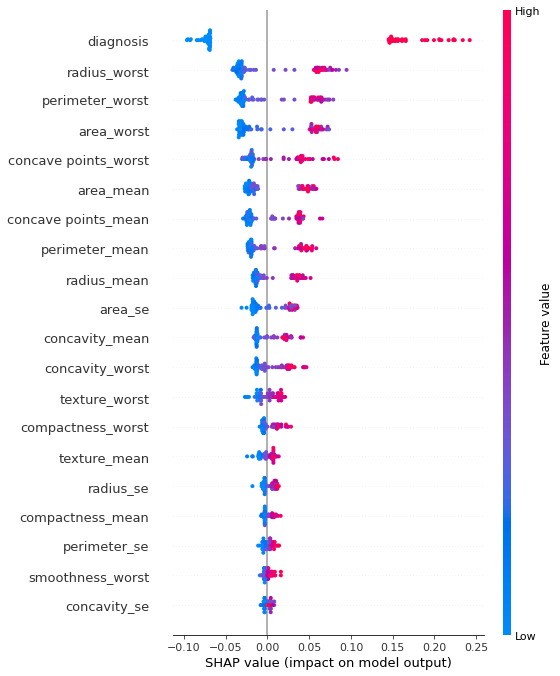

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[1], X_test)



## Inferences from the generated plot.

radius, perimeter and area major driver features for the binary classification between benign and malignant cancer.

##Plot a SHAP dependence plot using all features in the data

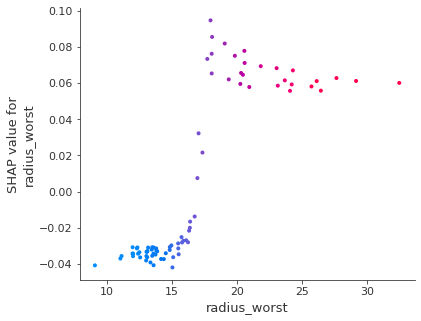

In [ ]:
shap.initjs()
shap.dependence_plot(ind='radius_worst', interaction_index='radius_worst',
                     shap_values=shap_values[1], 
                     features=X_test)

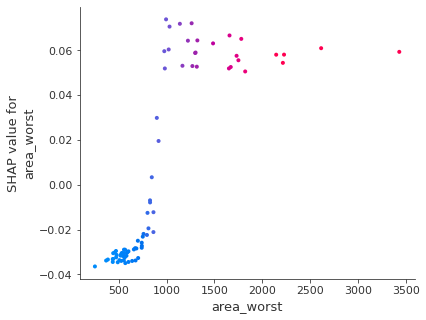

In [ ]:
shap.initjs()
shap.dependence_plot(ind='area_worst', interaction_index='area_worst',
                     shap_values=shap_values[1], 
                     features=X_test)

## Inferences from the generated plot.


As area or radius of tumour increases, the cancer has more probability to be malignant than benign.